In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv("/content/insurance.csv")
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


(a) Create vectors, factors, lists, matrices, and data frames
Vector (A column in pandas)

In [7]:
ages = df['age']
print("\nVector - Age Column:\n",ages)


Vector - Age Column:
 0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64


Factors / Categorical Data

In [8]:
print("\nCategories in 'sex' column:",df['sex'].unique())
print("\nCategories in 'smoker' column:",df['smoker'].unique())


Categories in 'sex' column: ['female' 'male']

Categories in 'smoker' column: ['yes' 'no']


 List (Combining two columns into a Python list)

In [12]:
sample_list = [list(df['age'][:5]),list(df['expenses'][:5])]
print("\n List - sample of ages and expeses:\n",sample_list)


 List - sample of ages and expeses:
 [[19, 18, 28, 33, 32], [16884.92, 1725.55, 4449.46, 21984.47, 3866.86]]


 Matrix (Using numpy to create matrix from DataFrame)

In [14]:
matrix=df[['age','expenses']].to_numpy()
print("\nMatrix - First 5 rows:\n",matrix[:5])


Matrix - First 5 rows:
 [[1.900000e+01 1.688492e+04]
 [1.800000e+01 1.725550e+03]
 [2.800000e+01 4.449460e+03]
 [3.300000e+01 2.198447e+04]
 [3.200000e+01 3.866860e+03]]


Data Frame (Original dataset serves as the DataFrame)


In [15]:
print("\nDataFrame Overview:\n",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

DataFrame Overview:
 None


Scatter Plot: Age vs Smoking

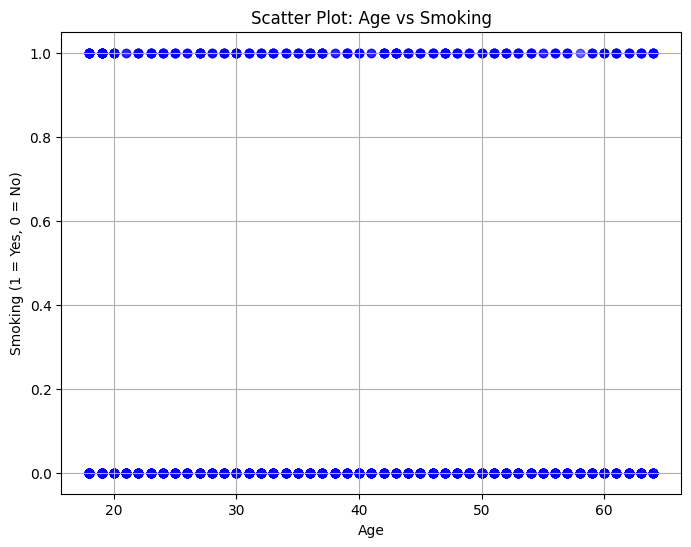

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['smoker'].apply(lambda x: 1 if x == 'yes' else 0), c='blue', alpha=0.6)
plt.title('Scatter Plot: Age vs Smoking')
plt.xlabel('Age')
plt.ylabel('Smoking (1 = Yes, 0 = No)')
plt.grid(True)
plt.show()

Filter data (age 20-40) and update the plot

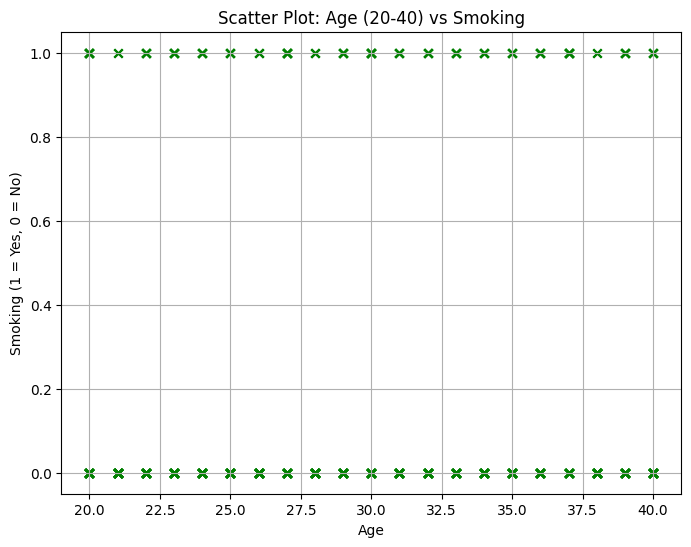

In [21]:
filtered_data = df[(df['age'] >= 20) & (df['age'] <= 40)]
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['age'], filtered_data['smoker'].apply(lambda x: 1 if x == 'yes' else 0), c='green', marker='x')
plt.title('Scatter Plot: Age (20-40) vs Smoking')
plt.xlabel('Age')
plt.ylabel('Smoking (1 = Yes, 0 = No)')
plt.grid(True)
plt.show()

Find expenses of smokers and non-smokers and plot a boxplot

<ipython-input-24-9fdae26f06cb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='expenses', data=df, palette='Set2')


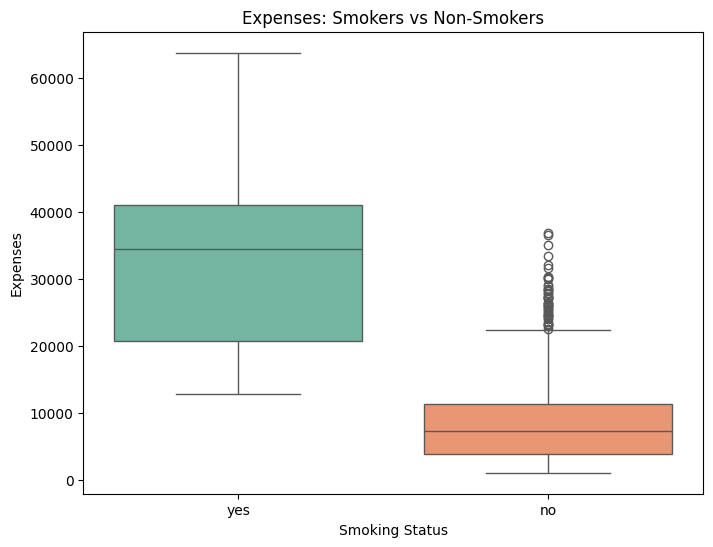

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='expenses', data=df, palette='Set2')
plt.title('Expenses: Smokers vs Non-Smokers')
plt.xlabel('Smoking Status')
plt.ylabel('Expenses')
plt.show()

Number of smokers gender-wise and bar plot

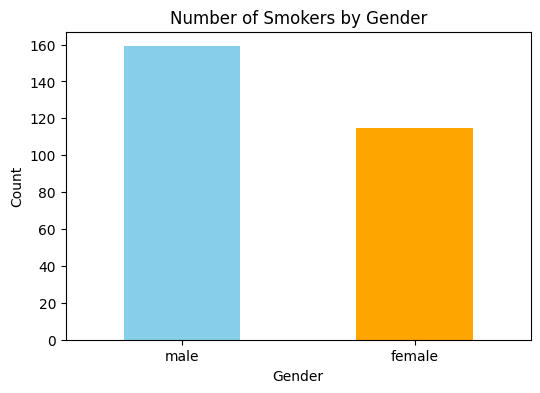

In [25]:
smokers_gender_counts = df[df['smoker'] == 'yes']['sex'].value_counts()
plt.figure(figsize=(6, 4))
smokers_gender_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Number of Smokers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


Number of smokers gender-wise and bar plot

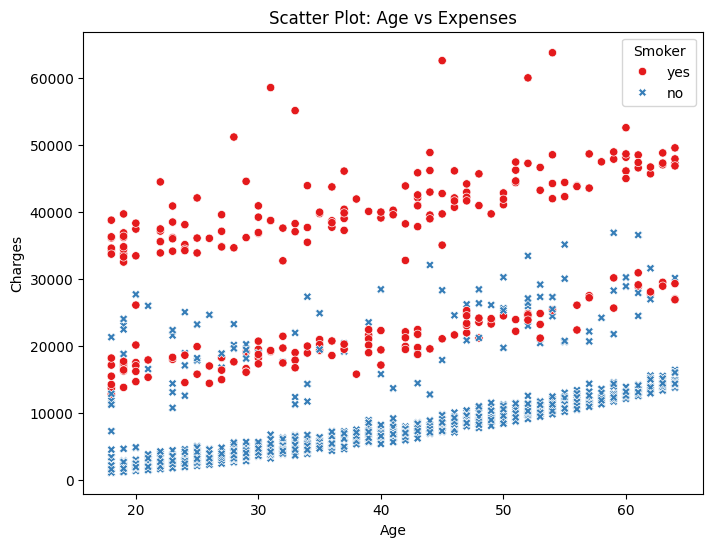

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='expenses', hue='smoker', style='smoker', data=df, palette='Set1')
plt.title('Scatter Plot: Age vs Expenses')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()